In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Spotify-2000.csv')

In [3]:
df.head(5)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [4]:
df.shape

(1994, 15)

In [5]:
df.isnull().sum()

,0
Index,0
Title,0
Artist,0
Top Genre,0
Year,0
Beats Per Minute (BPM),0
Energy,0
Danceability,0
Loudness (dB),0
Liveness,0


In [8]:
df['Top Genre'].nunique()

149

In [9]:
df['Top Genre'].unique()

array(['adult standards', 'album rock', 'alternative hip hop',
       'alternative metal', 'classic rock', 'alternative pop rock', 'pop',
       'modern rock', 'detroit hip hop', 'alternative rock',
       'dutch indie', 'garage rock', 'dutch cabaret', 'permanent wave',
       'classic uk pop', 'dance pop', 'modern folk rock', 'dutch pop',
       'dutch americana', 'alternative dance', 'german pop', 'afropop',
       'british soul', 'irish rock', 'disco', 'big room', 'art rock',
       'danish pop rock', 'neo mellow', 'britpop', 'boy band',
       'carnaval limburg', 'arkansas country', 'latin alternative',
       'british folk', 'celtic', 'chanson', 'celtic rock', 'hip pop',
       'east coast hip hop', 'dutch rock', 'blues rock', 'electro',
       'australian pop', 'belgian rock', 'downtempo', 'reggae fusion',
       'british invasion', 'finnish metal', 'canadian pop', 'bow pop',
       'dutch hip hop', 'dutch metal', 'soft rock', 'acoustic pop',
       'acid jazz', 'dutch prog', 'ca

In [10]:
df.columns

Index(['Index', 'Title', 'Artist', 'Top Genre', 'Year',
       'Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)',
       'Liveness', 'Valence', 'Length (Duration)', 'Acousticness',
       'Speechiness', 'Popularity'],
      dtype='object')

#### Checking for duplicates

In [12]:
df['Title'].duplicated()

,Title
0,False
1,False
2,False
3,False
4,False
...,...
1989,False
1990,False
1991,False
1992,False


In [13]:
df['Title'].duplicated().sum()

np.int64(36)

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.duplicated(subset=['Title', 'Artist']).sum()

np.int64(0)

In [18]:
df[df.duplicated(subset=['Title'], keep=False)]

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
54,55,Hurt,Christina Aguilera,dance pop,2006,149,30,33,-7,11,14,243,78,3,67
116,117,Feeling Good,Muse,modern rock,2001,109,42,35,-8,10,27,199,30,3,51
138,139,Home,Michael Bublé,adult standards,2005,128,37,61,-9,11,35,226,84,3,64
226,227,One,Mary J. Blige,dance pop,2005,186,87,34,-3,13,27,260,8,8,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,1891,Suzanne,Leonard Cohen,canadian folk,1967,132,17,41,-16,11,35,229,92,4,66
1917,1918,Somebody to Love,Jefferson Airplane,album rock,1967,132,58,50,-9,32,65,175,41,3,69
1967,1968,Proud Mary,Creedence Clearwater Revival,album rock,1969,121,39,72,-17,5,79,187,16,3,60
1980,1981,Summertime,Brainbox,dutch prog,1969,89,55,38,-9,31,25,263,4,3,36


Conclusion:

There are no entire rows which are duplicate.There are rows with duplicate title but this might indicate that new version of same song was released later bcoz all other fields related to that song are varying.So we wont drop them.

In [19]:
# Addind buckets to Popularity which we may use later for visualization and classification problem
df['Popularity_Level'] = pd.cut(df['Popularity'],
                                 bins=[0, 50, 75, 100],
                                 labels=['Low', 'Medium', 'High'])

In [20]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Popularity_Level
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71,Medium
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39,Low
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69,Medium
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76,High
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59,Medium


#### Visualization to get some insights on data

(array([ 16.,  36.,  97., 234., 334., 428., 501., 308.,  36.,   4.]),
 array([ 11. ,  19.9,  28.8,  37.7,  46.6,  55.5,  64.4,  73.3,  82.2,
         91.1, 100. ]),
 <BarContainer object of 10 artists>)

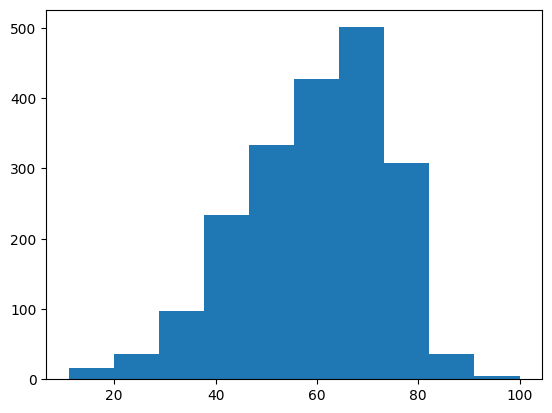

In [24]:
# ----- Target Distribution ----------
plt.hist(data=df,x='Popularity')

Conclusion:

So from given histogram we can see that our target feature is mostly left skewed. So when our data is skewed go for regression task for given data so it gives more valueable insights when model is actually trained.

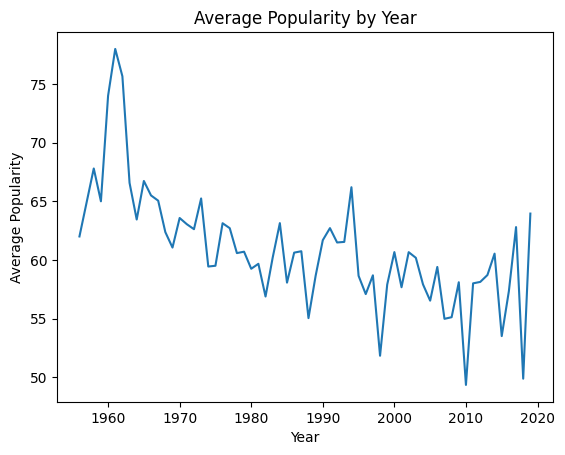

In [27]:
# ---- Time Trend ------
average_popularity_by_year = df.groupby('Year')['Popularity'].mean().reset_index()
plt.plot(average_popularity_by_year['Year'],average_popularity_by_year['Popularity'])
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.title('Average Popularity by Year')
plt.show()

Conclusion:

We can see that highest avg popularity was in 1960 then the trend went on decreasing with years with bit flatuations.

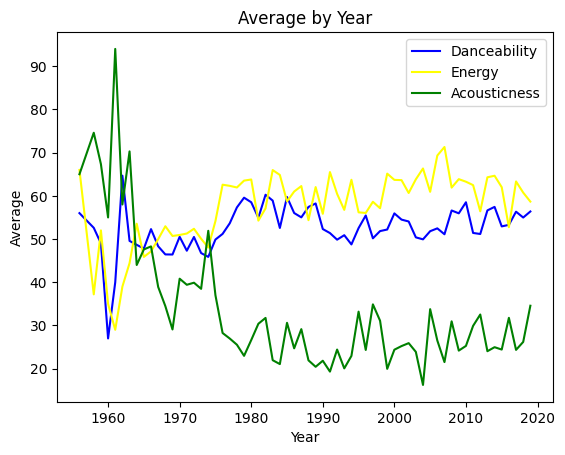

In [30]:
# ---- Danceability, Energy, Acousticness vs. Year ----
average__by_year = df.groupby('Year')[['Danceability','Energy','Acousticness']].mean().reset_index()
plt.plot(average__by_year['Year'],average__by_year['Danceability'],color = 'blue')
plt.plot(average__by_year['Year'],average__by_year['Energy'] , color = 'yellow')
plt.plot(average__by_year['Year'],average__by_year['Acousticness'] , color = 'green')
plt.legend(['Danceability','Energy','Acousticness'])
plt.xlabel('Year')
plt.ylabel('Average')
plt.title('Average by Year')
plt.show()

Conclusion:

Danceability and Energy remains constant over years , whereas Acousticness decreases with years.

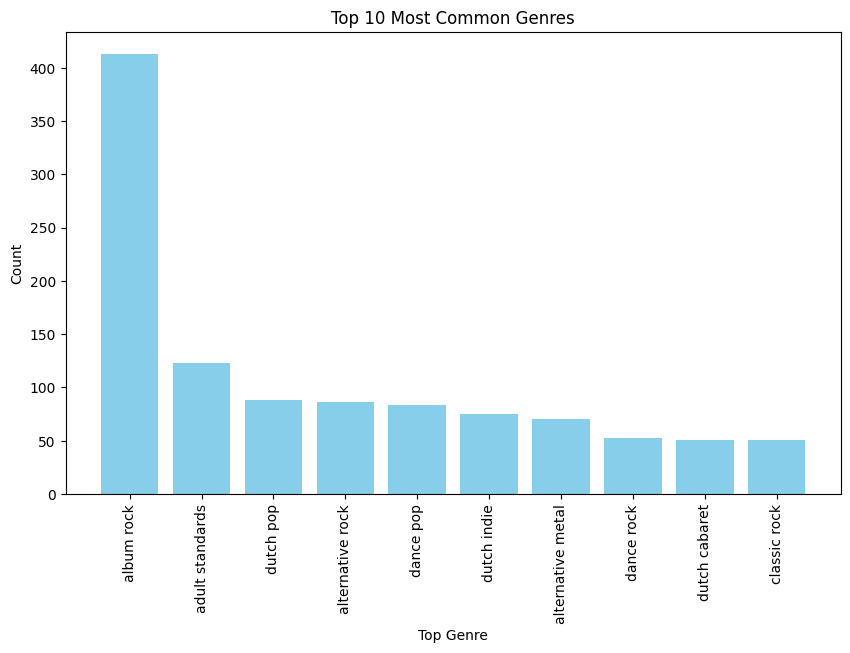

In [33]:
# ----- Top 10 most common Top Genre ----
# Get top 10 genres
top_genres = df['Top Genre'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
plt.bar(top_genres.index, top_genres.values, color='skyblue')
plt.xlabel('Top Genre')
plt.ylabel('Count')
plt.title('Top 10 Most Common Genres')
plt.xticks(rotation=90)
plt.show()


Conclusion:

So most common Genre is album rock then adult standards and so on.

<ipython-input-36-3857331385>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Top Genre', y='Popularity', data=df_top_genres, palette='Set2')


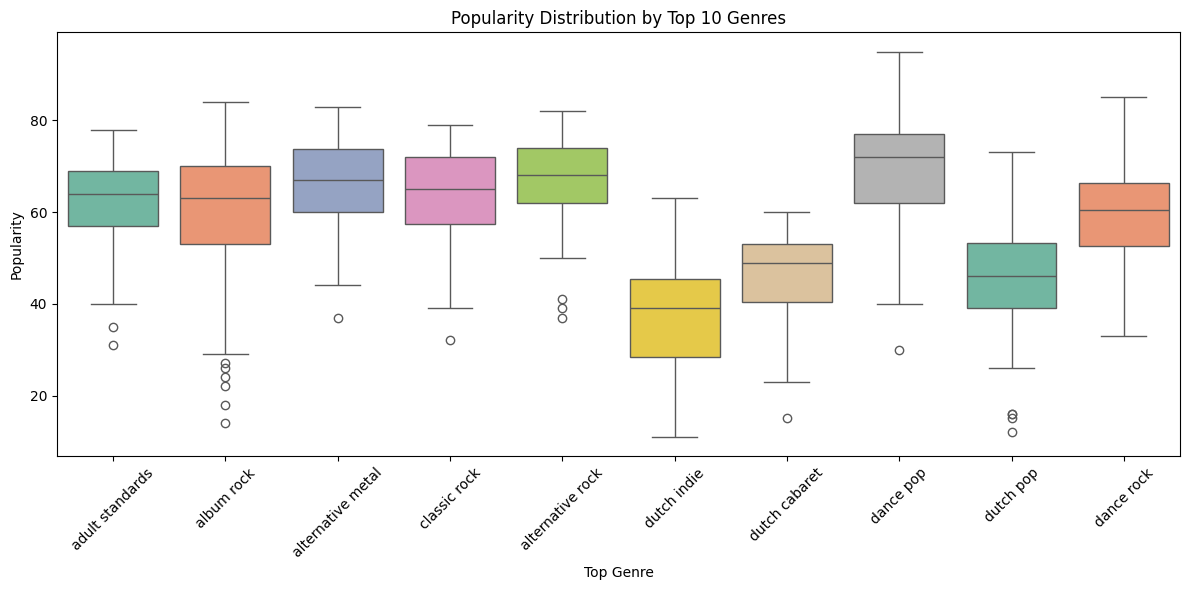

In [36]:
#-----  Popularity by Top Genre ------
# Get top 10 genres
top_genres = df['Top Genre'].value_counts().head(10).index
df_top_genres = df[df['Top Genre'].isin(top_genres)]

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Top Genre', y='Popularity', data=df_top_genres, palette='Set2')
plt.title('Popularity Distribution by Top 10 Genres')
plt.xlabel('Top Genre')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Cocusion:

Soo from the boxplot we can see album rum is most popular with some outliers. Dutch indie has lowest populariity with no outliers . Dance rock also has good popularity with no outliers and rest of them also seem to be fine.


<ipython-input-43-4196330455>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Top Genre', y='Energy', data=df_top_genres, palette='Set2')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'adult standards'),
  Text(1, 0, 'album rock'),
  Text(2, 0, 'alternative metal'),
  Text(3, 0, 'classic rock'),
  Text(4, 0, 'alternative rock'),
  Text(5, 0, 'dutch indie'),
  Text(6, 0, 'dutch cabaret'),
  Text(7, 0, 'dance pop'),
  Text(8, 0, 'dutch pop'),
  Text(9, 0, 'dance rock')])

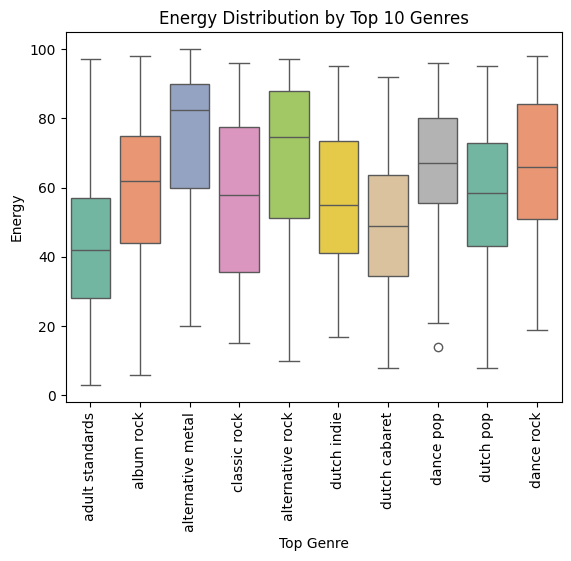

In [43]:
#---- Energy or Danceability across genres -----
# Get top 10 genres
top_genres = df['Top Genre'].value_counts().head(10).index
df_top_genres = df[df['Top Genre'].isin(top_genres)]

# Plot
sns.boxplot(x='Top Genre', y='Energy', data=df_top_genres, palette='Set2')
plt.title('Energy Distribution by Top 10 Genres')
plt.xlabel('Top Genre')
plt.ylabel('Energy')
plt.xticks(rotation=90)

<ipython-input-42-1836592362>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Top Genre', y='Danceability', data=df_top_genres, palette='Set2')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'adult standards'),
  Text(1, 0, 'album rock'),
  Text(2, 0, 'alternative metal'),
  Text(3, 0, 'classic rock'),
  Text(4, 0, 'alternative rock'),
  Text(5, 0, 'dutch indie'),
  Text(6, 0, 'dutch cabaret'),
  Text(7, 0, 'dance pop'),
  Text(8, 0, 'dutch pop'),
  Text(9, 0, 'dance rock')])

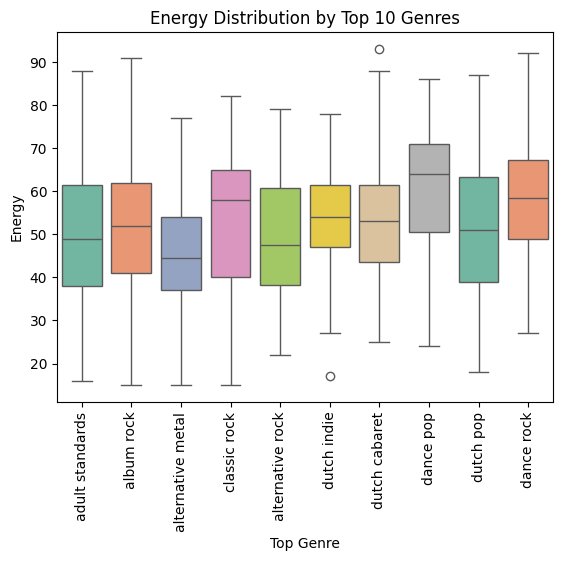

In [42]:
# Get top 10 genres
top_genres = df['Top Genre'].value_counts().head(10).index
df_top_genres = df[df['Top Genre'].isin(top_genres)]

# Plot
sns.boxplot(x='Top Genre', y='Danceability', data=df_top_genres, palette='Set2')
plt.title('Energy Distribution by Top 10 Genres')
plt.xlabel('Top Genre')
plt.ylabel('Energy')
plt.xticks(rotation=90)

Conclusion:

Soo from above box plots by genre for Danceablity and Energy we dont find outlier as we have already seen the trend for both features was constant over years so we wont find much outliers.

In [46]:
df.dtypes

,0
Index,int64
Title,object
Artist,object
Top Genre,object
Year,int64
Beats Per Minute (BPM),int64
Energy,int64
Danceability,int64
Loudness (dB),int64
Liveness,int64


In [47]:
df['Length (Duration)'].head(10)

,Length (Duration)
0,201
1,207
2,341
3,269
4,256
5,247
6,257
7,366
8,223
9,290


In [49]:
# Remove commas and convert to int
df['Length (Duration)'] = df['Length (Duration)'].str.replace(',', '').astype(int)

In [50]:
df.dtypes

,0
Index,int64
Title,object
Artist,object
Top Genre,object
Year,int64
Beats Per Minute (BPM),int64
Energy,int64
Danceability,int64
Loudness (dB),int64
Liveness,int64


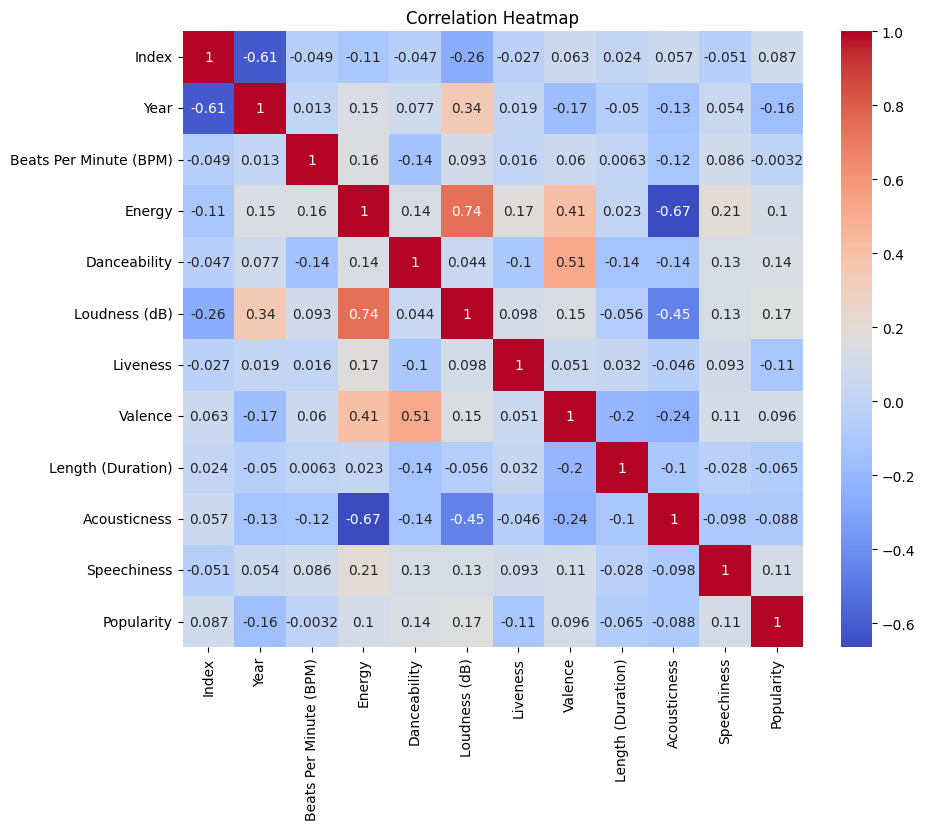

In [52]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Conclusion:

Heatmap helps to find multicollinearity and find patterns between features.

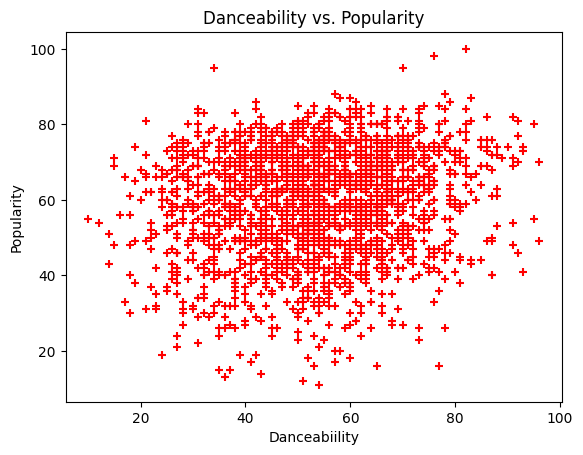

In [54]:
#------ Danceability vs. Popularity -----
plt.scatter(df['Danceability'],df['Popularity'],color='red',marker='+')
plt.title('Danceability vs. Popularity')
plt.ylabel('Popularity')
plt.xlabel('Danceabiility')
plt.show()

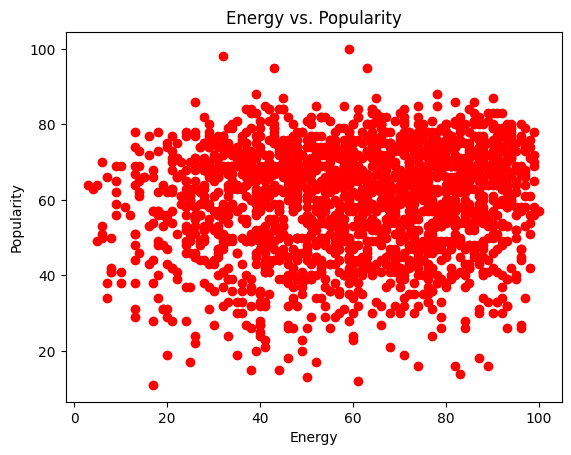

In [56]:
# ------ Energy vs. Popularity ------
plt.scatter(df['Energy'],df['Popularity'],color='red',marker='o')
plt.title('Energy vs. Popularity')
plt.ylabel('Popularity')
plt.xlabel('Energy')
plt.show()

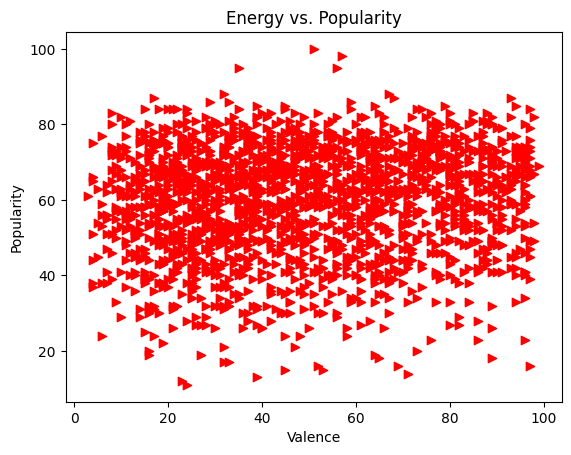

In [57]:
# ------ Valence vs. Popularity ------
plt.scatter(df['Valence'],df['Popularity'],color='red',marker='>')
plt.title('Energy vs. Popularity')
plt.ylabel('Popularity')
plt.xlabel('Valence')
plt.show()

Coclusion:

Scatter plot is used for:

Bivariate Analysis ,
numerical vs numerical ,
Use case - Finding correlation

From all scatter plot we can find good distribution.

In [58]:
# Final dataframe
df_final = df.drop(['Index', 'Title', 'Artist','Popularity_Level'], axis=1)

In [59]:
# One-Hot Encode Categorical Column: Top Genre
df_final = pd.get_dummies(df_final, columns=['Top Genre'], drop_first=True)

In [60]:
df_final.dtypes

,0
Year,int64
Beats Per Minute (BPM),int64
Energy,int64
Danceability,int64
Loudness (dB),int64
...,...
Top Genre_stomp and holler,bool
Top Genre_streektaal,bool
Top Genre_trance,bool
Top Genre_uk pop,bool


In [64]:
# Define features and target
X = df_final.drop('Popularity', axis=1)
y = df_final['Popularity']

In [65]:
# Scale the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [66]:
# train/ test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Modeling using different algorithms

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 9.468521303258145
R² Score: 0.36095197671088586


In [68]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 9.492996141248437
R² Score: 0.34342360006874606


In [69]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 9.151238942318837
R² Score: 0.3702125888271738
